In [1]:
import pandas as pd
import numpy as np
import sys

In [2]:
graphs = ["TREE", "rrg", "proximity", "work"]

In [13]:
res_params = {}
for g in graphs:
    temp = pd.read_csv(f"{g}/res_params.gz", index_col=0)
    sib_df = temp.drop(['lambda_nn', 'mu_nn'], axis=1)
    nn_df = temp.drop(['lambda_sib', 'mu_sib'], axis=1)
    sib_df = sib_df.rename(columns={"lambda_sib": "lambda_inf", "mu_sib": "mu_inf"})
    nn_df = nn_df.rename(columns={"lambda_nn": "lambda_inf", "mu_nn": "mu_inf"})
    sib_df["err_lambda"] = np.abs(sib_df["lambda_inf"] - sib_df["lambda"])
    sib_df["err_mu"] = np.abs(sib_df["mu_inf"] - sib_df["mu"])
    sib_df["err_lambda_per"] = 100*np.abs(sib_df["lambda_inf"] - sib_df["lambda"])/sib_df["lambda"]
    sib_df["err_mu_per"] = 100*np.abs(sib_df["mu_inf"] - sib_df["mu"])/sib_df["mu"]
    
    nn_df["err_lambda"] = np.abs(nn_df["lambda_inf"] - nn_df["lambda"])
    nn_df["err_mu"] = np.abs(nn_df["mu_inf"] - nn_df["mu"])
    nn_df["err_lambda_per"] = 100*np.abs(nn_df["lambda_inf"] - nn_df["lambda"])/nn_df["lambda"]
    nn_df["err_mu_per"] = 100*np.abs(nn_df["mu_inf"] - nn_df["mu"])/nn_df["mu"]

    sib_df["algo"]=["SIB"]*len(sib_df)
    nn_df["algo"]=["ANN"]*len(nn_df)   
    q = sib_df["err_lambda_per"].quantile(0.95)
    sib_df=sib_df[sib_df["err_lambda_per"] < q]
    q = nn_df["err_lambda_per"].quantile(0.95)
    nn_df=nn_df[nn_df["err_lambda_per"] < q]
    res_params[g]=pd.concat([nn_df, sib_df])
    res_params[g]["type"] = [g]*len(res_params[g])

In [14]:
g_name = ["tree", "rrg", "proximity", "work"]
for i_g, g in enumerate(graphs):
    res_params[g]["type"] = [g_name[i_g]]*len(res_params[g])

In [15]:
all_pd = pd.concat( list(res_params.values()), ignore_index = True)

In [16]:
all_pd

,lambda_inf,mu_inf,mu,lambda,err_lambda,err_mu,err_lambda_per,err_mu_per,algo,type
0,0.434606,1.000000e-06,0.00,0.350,0.084606,1.000000e-06,24.173105,inf,ANN,tree
1,0.444826,1.000000e-06,0.00,0.350,0.094826,1.000000e-06,27.093026,inf,ANN,tree
2,0.329926,1.000000e-06,0.00,0.350,0.020074,1.000000e-06,5.735552,inf,ANN,tree
3,0.379899,1.000000e-06,0.00,0.350,0.029899,1.000000e-06,8.542689,inf,ANN,tree
4,0.326576,1.000000e-06,0.00,0.350,0.023424,1.000000e-06,6.692684,inf,ANN,tree
...,...,...,...,...,...,...,...,...,...,...
67,0.001054,1.229023e-02,0.02,0.001,0.000054,7.709768e-03,5.411746,38.548838,SIB,work
68,0.001039,1.313067e-02,0.02,0.001,0.000039,6.869328e-03,3.899801,34.346639,SIB,work
69,0.001109,1.362896e-02,0.02,0.001,0.000109,6.371039e-03,10.868899,31.855197,SIB,work
70,0.000927,8.579230e-03,0.02,0.001,0.000073,1.142077e-02,7.330052,57.103848,SIB,work


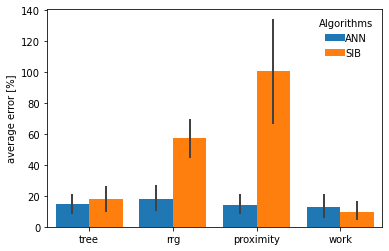

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_lambda_per", hue="algo",
                 data=all_pd, palette="tab10", errwidth=2,saturation=1)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("average error [%]")
plt.xlabel("")
plt.savefig("img/params.pdf")
plt.savefig("img/params.png")
plt.show()

In [25]:
res_params[g][res_params[g]["algo"]=="ann"]

,lambda_inf,mu_inf,mu,lambda,err_lambda,err_mu,err_lambda_per,err_mu_per,algo,type


In [26]:
means=[]
for g in graphs:
    means
    ann={"algo":"ann"
        
        }
    ann = res_params[g][res_params[g]["algo"]=="ANN"]["lambda_inf"].mean()
    sib = res_params[g][res_params[g]["algo"]=="SIB"]["lambda_inf"].mean()
    l = res_params[g]["lambda"].mean()
    annM = res_params[g][res_params[g]["algo"]=="ANN"]["mu_inf"].mean()
    sibM = res_params[g][res_params[g]["algo"]=="SIB"]["mu_inf"].mean()
    mu = res_params[g]["mu"].mean()
    print(sib, ann)
    means.append({"algo":"sib", "mean":sib, "type":g, 
                  "err":abs(sib-l), "err_per":100*abs(sib-l)/l,
                 "err_mu":abs(sibM-mu), "err_per_mu":100*abs(sibM-mu)/(mu+1e-2)})
    means.append({"algo":"ann", "mean":ann, "type":g,
                  "err":abs(ann-l), "err_per":100*abs(ann-l)/l,
                 "err_mu":abs(annM-mu), "err_per_mu":100*abs(annM-mu)/(mu+1e-2)})

means = pd.DataFrame(means)
means

0.36657219990450707 0.3452567524380154
0.053345754636064564 0.03955619057847389
0.05782300549375749 0.029113213428192633
0.0010642633593552003 0.0009051131589027222


,algo,mean,type,err,err_per,err_mu,err_per_mu
0,sib,0.366572,TREE,0.016572,4.734914,9.999995e-07,0.010000
1,ann,0.345257,TREE,0.004743,1.355214,1.000000e-06,0.010000
2,sib,0.053346,rrg,0.013346,33.364387,4.499054e-03,14.996846
3,ann,0.039556,rrg,0.000444,1.109524,3.419444e-04,1.139815
4,sib,0.057823,proximity,0.027823,92.743352,5.684495e-03,18.948315
5,ann,0.029113,proximity,0.000887,2.955955,5.080251e-03,16.934171
6,sib,0.001064,work,0.000064,6.426336,8.292385e-04,2.764128
7,ann,0.000905,work,0.000095,9.488684,2.569880e-04,0.856627


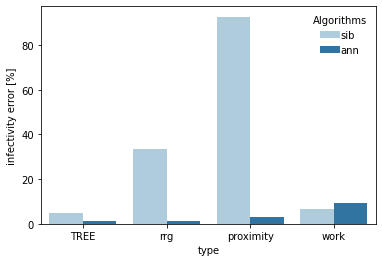

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_per", hue="algo",
                 data=means, dodge=True, ci=0.3, palette="Paired")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("infectivity error [%]")
plt.show()

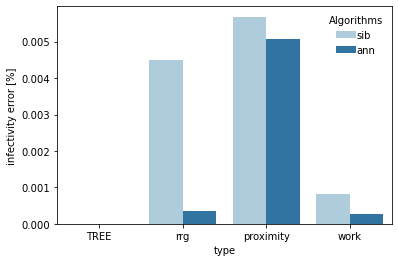

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.barplot(x="type", y="err_mu", hue="algo",
                 data=means, dodge=True, ci=0.3, palette="Paired")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Algorithms",
          handletextpad=0, columnspacing=1,
           ncol=1, frameon=False)
plt.ylabel("infectivity error [%]")
#plt.ylim(0,150)
plt.show()